**PREDICTING A PULSAR STAR
Dr Robert Lyon**

HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey .

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter .

As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation . Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted, which treat the candidate data sets as binary classification problems. Here the legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.

Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).

**About Pulsar**

A pulsar (from pulse and -ar as in quasar)[1] is a highly magnetized rotating neutron star or white dwarf that emits a beam of electromagnetic radiation. This radiation can be observed only when the beam of emission is pointing toward Earth (much like the way a lighthouse can be seen only when the light is pointed in the direction of an observer), and is responsible for the pulsed appearance of emission. Neutron stars are very dense, and have short, regular rotational periods. This produces a very precise interval between pulses that ranges from milliseconds to seconds for an individual pulsar. Pulsars are one of the candidates for the source of ultra-high-energy cosmic rays (see also centrifugal mechanism of acceleration).

In [1]:
from PIL import Image

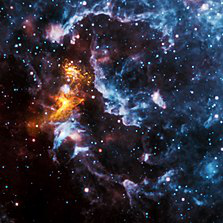

In [2]:
Image.open('pulsar.jpg')

# Importing Basic Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

# Reading the Data

In [4]:
data = pd.read_csv('pulsar_stars.csv')

In [5]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


**Attribute Information:**
Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class (The class labels used are 0 (negative) and 1 (positive)).

In [6]:
#Renaming the columns

In [7]:
data.rename(columns={' Mean of the integrated profile':'Mean',' Standard deviation of the integrated profile':'Std'\
                     ,' Excess kurtosis of the integrated profile':'Kurtosis',' Skewness of the integrated profile':'Skewness'\
                     ,' Mean of the DM-SNR curve':'Mean-SNR',' Standard deviation of the DM-SNR curve':'Std-SNR'\
                     ,' Excess kurtosis of the DM-SNR curve':'Kurtosis-SNR'\
                     ,' Skewness of the DM-SNR curve':'Skewness-SNR','target_class':'Target'},inplace=True)

In [8]:
data.head()

,Mean,Std,Kurtosis,Skewness,Mean-SNR,Std-SNR,Kurtosis-SNR,Skewness-SNR,Target
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


# Basic Information of Data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
Mean            17898 non-null float64
Std             17898 non-null float64
Kurtosis        17898 non-null float64
Skewness        17898 non-null float64
Mean-SNR        17898 non-null float64
Std-SNR         17898 non-null float64
Kurtosis-SNR    17898 non-null float64
Skewness-SNR    17898 non-null float64
Target          17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


**17898** entries with **9** features(including the target variable).

# Basic Description

In [10]:
data.describe()

,Mean,Std,Kurtosis,Skewness,Mean-SNR,Std-SNR,Kurtosis-SNR,Skewness-SNR,Target
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


# Checking for null values

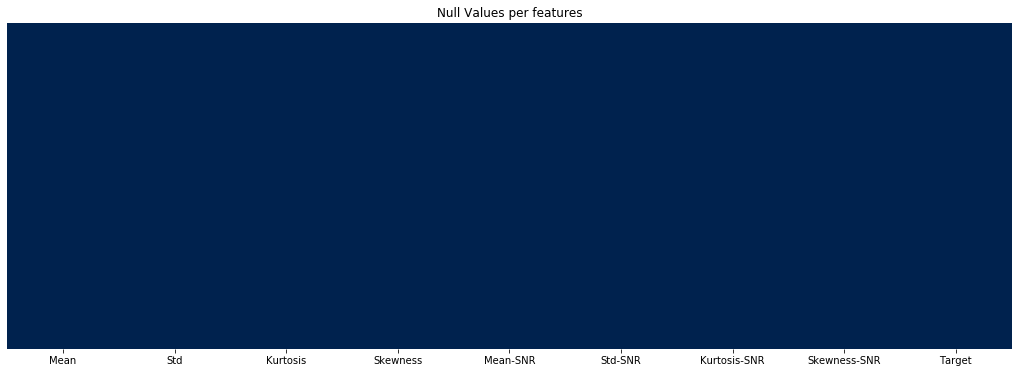

In [11]:
plt.figure(figsize=(18,6))
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap='cividis')
plt.title('Null Values per features')
plt.xticks(rotation=0);

i.e No Null values present.

# Basic Visualizations : 

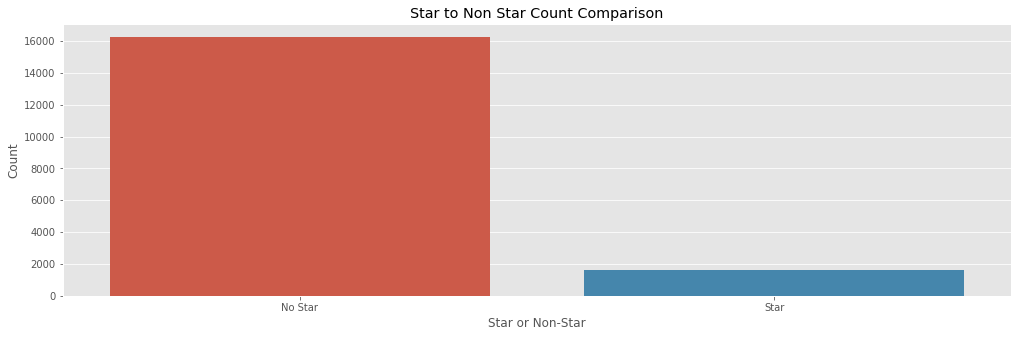

In [12]:
# Counts of Star to Non-Star
plt.style.use('ggplot')
plt.figure(figsize=(17,5))
plt.title('Star to Non Star Count Comparison')
sns.countplot(data['Target'].map({0:'No Star',1:'Star'}))
plt.xlabel('Star or Non-Star')
plt.ylabel('Count');

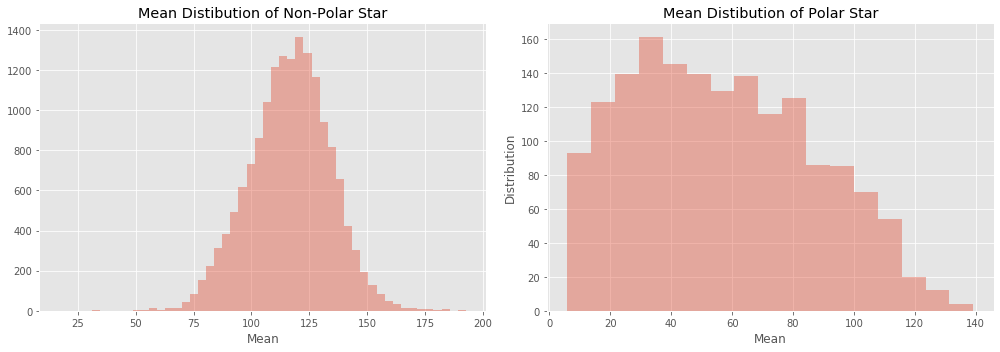

In [13]:
# Mean Distribution for polar stars to no polar star

fig,axis = plt.subplots(figsize=(14,5),nrows=1,ncols=2)

sns.distplot(data[data['Target']==0]['Mean'],ax=axis[0],kde=False)
axis[0].set_title('Mean Distibution of Non-Polar Star')
sns.distplot(data[data['Target']==1]['Mean'],ax=axis[1],kde=False)
axis[1].set_title('Mean Distibution of Polar Star')

plt.ylabel('Distribution')
plt.tight_layout()

From this we can conquer that Mean of the integrated profile is lot higher in Non-Polar Stars than that of Polar Stars.

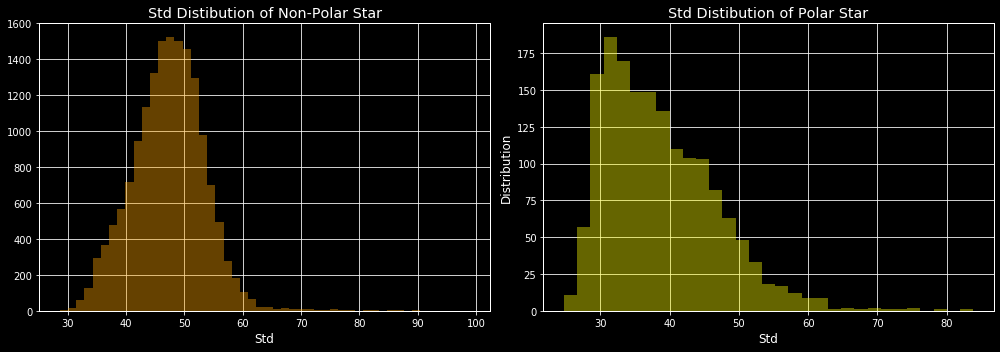

In [14]:
# Standard Deviation for polar stars to no polar star

plt.style.use('dark_background')
fig,axis = plt.subplots(figsize=(14,5),nrows=1,ncols=2)

sns.distplot(data[data['Target']==0]['Std'],ax=axis[0],kde=False,color='orange')
axis[0].set_title('Std Distibution of Non-Polar Star')
sns.distplot(data[data['Target']==1]['Std'],ax=axis[1],kde=False,color='yellow')
axis[1].set_title('Std Distibution of Polar Star')

plt.ylabel('Distribution')
plt.tight_layout()

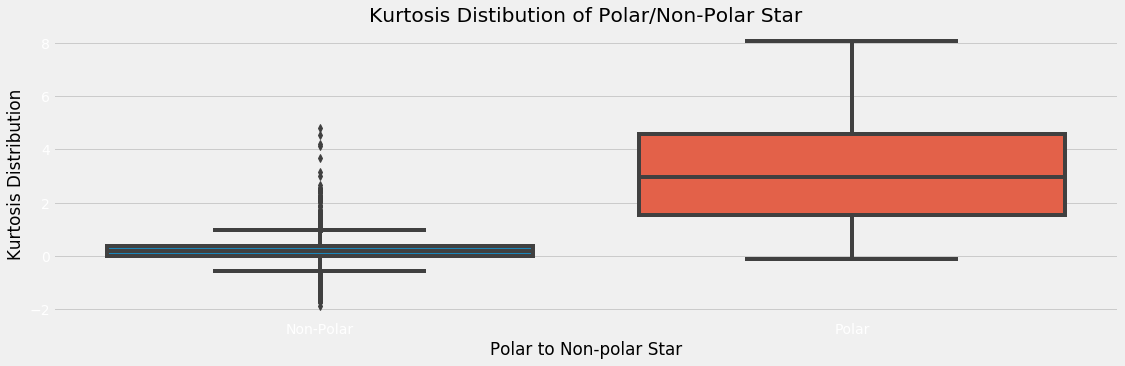

In [15]:
# Kurtosis for polar stars to no polar star

plt.style.use('fivethirtyeight')
plt.figure(figsize=(17,5))
plt.title('Kurtosis Distibution of Polar/Non-Polar Star',color='black')
sns.boxplot(data['Target'].map({0:'Non-Polar',1:'Polar'}),data['Kurtosis'])
plt.ylabel('Kurtosis Distribution',color='black')
plt.xlabel('Polar to Non-polar Star',color='black');

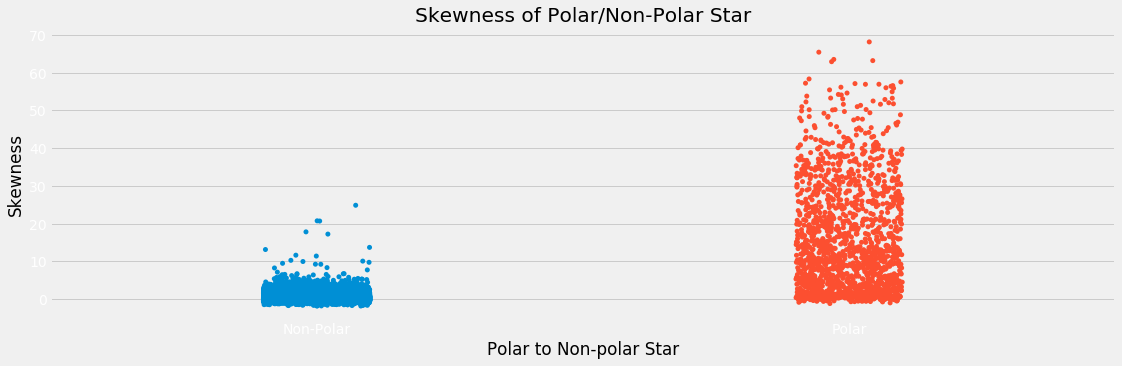

In [16]:
# Skewness for polar stars to no polar star

plt.style.use('fast')
plt.figure(figsize=(17,5))
plt.title('Skewness of Polar/Non-Polar Star',color='black')
sns.stripplot(data['Target'].map({0:'Non-Polar',1:'Polar'}),data['Skewness'],cmap='cividis',jitter=True)
plt.ylabel('Skewness',color='black')
plt.xlabel('Polar to Non-polar Star',color='black');

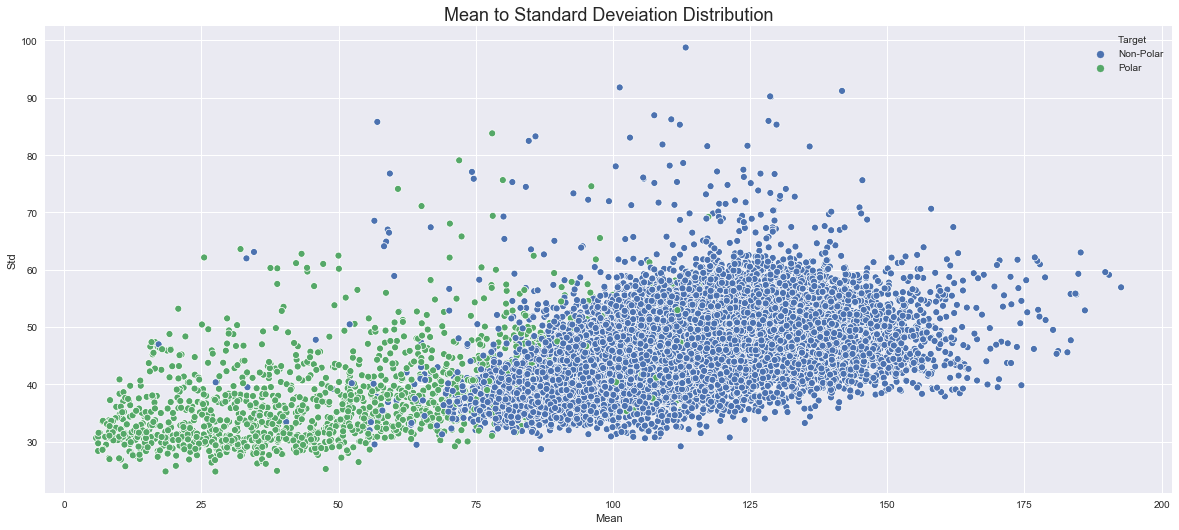

In [17]:
plt.style.use('seaborn')
plt.figure(figsize=(18,8))
sns.scatterplot(data['Mean'],data['Std'],hue=data['Target'].map({0:'Non-Polar',1:'Polar'}))
plt.title('Mean to Standard Deveiation Distribution',fontsize=18);

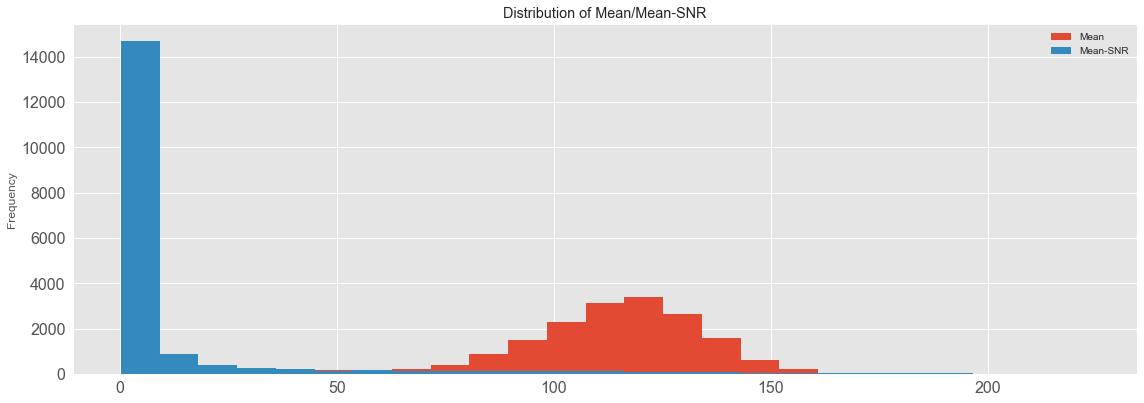

In [18]:
plt.style.use('ggplot')
data[['Mean','Mean-SNR']].plot(kind='hist',bins=25,figsize=(17,6),fontsize=16)
plt.title('Distribution of Mean/Mean-SNR');

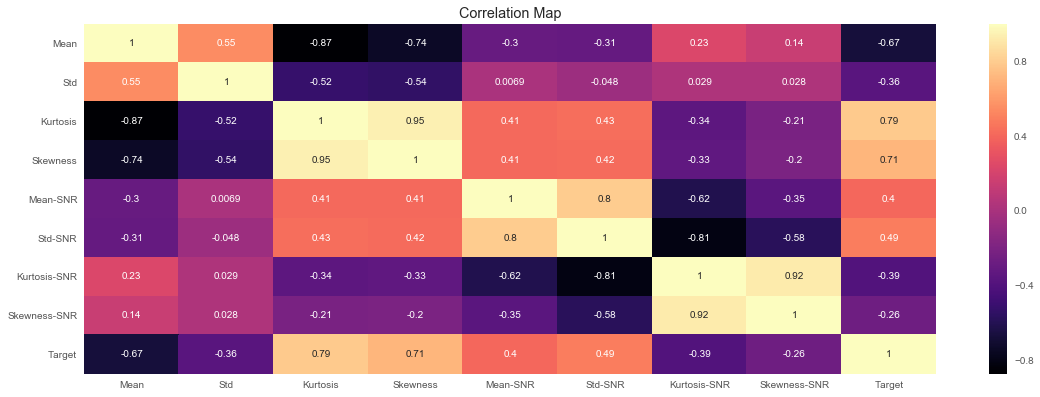

In [19]:
plt.figure(figsize=(17,6))
plt.title('Correlation Map')
sns.heatmap(data.corr(),cmap='magma',annot=True);

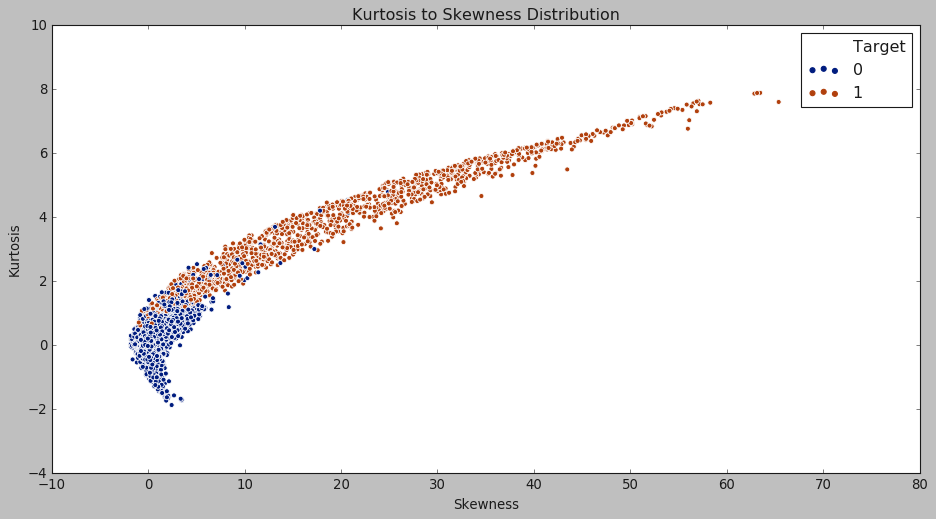

In [20]:
sns.set(style='darkgrid')
plt.style.use('classic')
plt.figure(figsize=(14,7))
sns.scatterplot(data['Skewness'],data['Kurtosis'],hue=data['Target'],palette='dark')
plt.title('Kurtosis to Skewness Distribution');

Note: Nike has'nt paid me for that

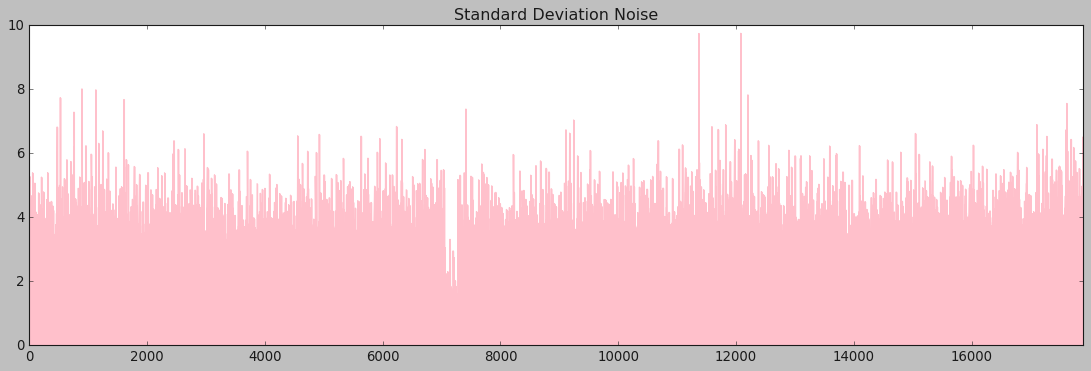

In [21]:
plt.style.use('fast')
plt.figure(figsize=(17,5))
(data['Std']/data['Std-SNR']).plot(kind='area',color='pink')
plt.title('Standard Deviation Noise');

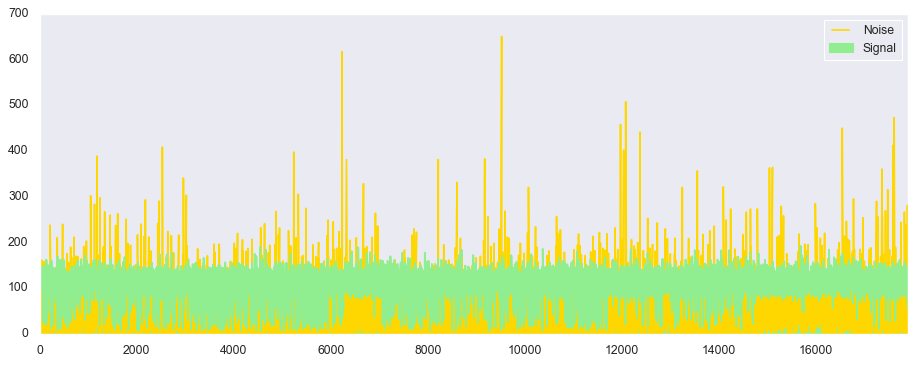

In [22]:
sns.set(style='dark')
plt.figure(figsize=(14,5))
(data['Mean']/data['Mean-SNR']).plot(color='gold',label='Noise')
data['Mean'].plot(kind='area',color='lightgreen',label='Signal')
plt.legend()

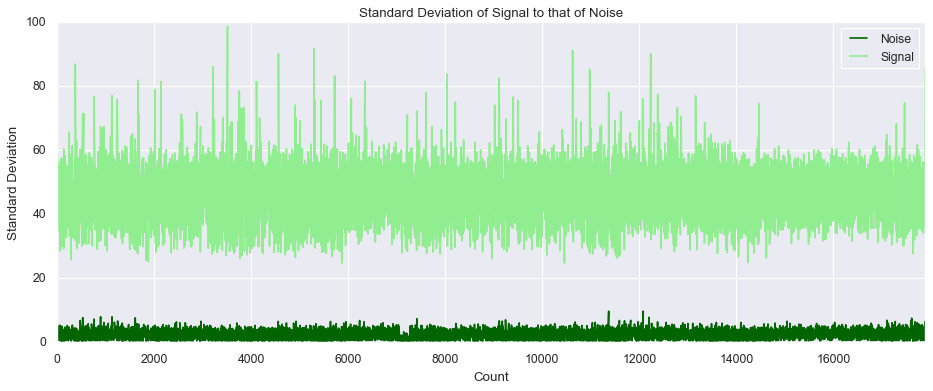

In [23]:
sns.set(style='darkgrid')
plt.figure(figsize=(14,5))
plt.title('Standard Deviation of Signal to that of Noise')
(data['Std']/data['Std-SNR']).plot(color='darkgreen',label='Noise')
data['Std'].plot(kind='line',color='lightgreen',label='Signal')
plt.ylabel('Standard Deviation')
plt.xlabel('Count')
plt.legend();

# Appying Machine Learning

In [24]:
# Looking at the data again

data.head()

,Mean,Std,Kurtosis,Skewness,Mean-SNR,Std-SNR,Kurtosis-SNR,Skewness-SNR,Target
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


As we know their is no missing values in dataset,so no need of Imputing or fillna

Splitting the Data into Independent variables and Dependent 

Dependent : Target
Independent : All the other ones   

In [25]:
#Splitting

X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [26]:
# Looking at X and y

print('X :', X[:5],'\n\n','y : ',y[:5])

X : [[ 1.40562500e+02  5.56837821e+01 -2.34571412e-01 -6.99648398e-01
   3.19983278e+00  1.91104263e+01  7.97553179e+00  7.42422249e+01]
 [ 1.02507812e+02  5.88824300e+01  4.65318154e-01 -5.15087909e-01
   1.67725752e+00  1.48601457e+01  1.05764867e+01  1.27393580e+02]
 [ 1.03015625e+02  3.93416494e+01  3.23328365e-01  1.05116443e+00
   3.12123746e+00  2.17446687e+01  7.73582202e+00  6.31719091e+01]
 [ 1.36750000e+02  5.71784487e+01 -6.84146380e-02 -6.36238369e-01
   3.64297659e+00  2.09592803e+01  6.89649891e+00  5.35936607e+01]
 [ 8.87265625e+01  4.06722254e+01  6.00866079e-01  1.12349169e+00
   1.17892977e+00  1.14687196e+01  1.42695728e+01  2.52567306e+02]] 

 y :  [0 0 0 0 0]


In [27]:
#Normalizing the features ,i.e mean=0,std=1

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

In [28]:
# Looking at X again

print('X : ','\n\n',X[:5])

X :  

 [[ 1.14931702  1.33483164 -0.66956953 -0.400459   -0.31944026 -0.37062547
  -0.07279778 -0.28743812]
 [-0.3341682   1.80226533 -0.01178476 -0.37053549 -0.37110188 -0.5889241
   0.50442694  0.21158145]
 [-0.31437216 -1.05332222 -0.14523256 -0.11659286 -0.32210703 -0.23532816
  -0.12599609 -0.39137346]
 [ 1.0006944   1.55325441 -0.51340862 -0.39017809 -0.3044042  -0.27566649
  -0.31226539 -0.4813003 ]
 [-0.87140244 -0.85887881  0.11560871 -0.10486616 -0.38801036 -0.76311112
   1.32402614  1.38679399]]


In [29]:
# Splitting the data into training set and testing set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101,stratify=y)

In [30]:
# Looking at shape of X_train,X_test,y_train,y_test

print('X_train Shape : \n',X_train.shape,'\nX_test Shape : \n',X_test.shape,'\ny_train Shape : \n',y_train.shape,'\ny_test Shape : \n',y_test.shape)

X_train Shape : 
 (13423, 8) 
X_test Shape : 
 (4475, 8) 
y_train Shape : 
 (13423,) 
y_test Shape : 
 (4475,)


In [31]:
# defining the function for getting accuracy,confusion matrix and classification report

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,recall_score

accuracy = []
roc_score = []
recall = []

def metrics_func(y):
    for metric in [accuracy_score,confusion_matrix,classification_report,roc_auc_score,recall_score]:
        print('\n',str(metric).split(' ')[1]+' : ','\n')
        print(metric(y,y_test))
         
        if metric==accuracy_score:
            accuracy.append(metric(y_test,y))
        elif metric==roc_auc_score:
            roc_score.append(metric(y_test,y))
        elif metric==recall_score:
            recall.append(metric(y_test,y))

**Applying Logistic Regression**

In [33]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred = log_model.predict(X_test)

metrics_func(y_pred)


 accuracy_score :  

0.9789944134078212

 confusion_matrix :  

[[4050   79]
 [  15  331]]

 classification_report :  

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4129
           1       0.81      0.96      0.88       346

    accuracy                           0.98      4475
   macro avg       0.90      0.97      0.93      4475
weighted avg       0.98      0.98      0.98      4475


 roc_auc_score :  

0.9687572184338326

 recall_score :  

0.9566473988439307


In [35]:
from sklearn.metrics import roc_curve

def roc(model,y):
    fpr,tpr,threshold = roc_curve(y_test,y)
    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.title('ROC Curve')
    print('Area Under the Curve : {:.2f}'.format(roc_auc_score(y_test,probs)))

Area Under the Curve : 0.98


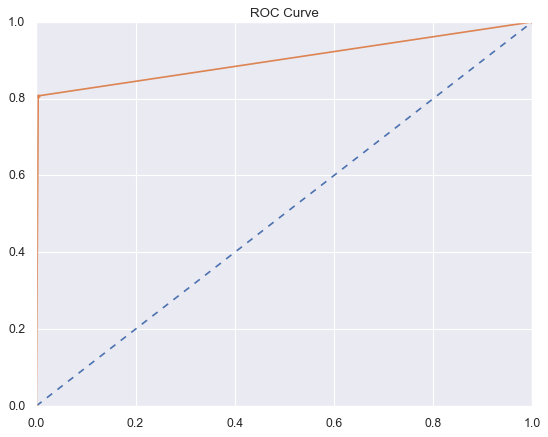

In [36]:
roc(log_model,y_pred)

**Applying Decision Trees**

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV

dt_model = DecisionTreeClassifier()

params = {'criterion':['gini','entropy'],'max_depth':[5,10,12,15],'min_samples_split':[0.01,0.05,0.1,0.15],'min_samples_leaf':[0.01,0.05,0.1,0.15]}

dt_grid = GridSearchCV(dt_model,params,cv=10,scoring='accuracy',n_jobs=-1)

In [38]:
dt_grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 12, 15],
                       

In [39]:
dt_grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 0.01,
 'min_samples_split': 0.01}

In [40]:
dt_grid.best_score_

0.9767563137897638

In [41]:
dt_grid_model = dt_grid.best_estimator_

In [42]:
dt_grid_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.01, min_samples_split=0.01,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
y_pred = dt_grid_model.predict(X_test)

In [44]:
metrics_func(y_pred)


 accuracy_score :  

0.9783240223463687

 confusion_matrix :  

[[4042   74]
 [  23  336]]

 classification_report :  

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4116
           1       0.82      0.94      0.87       359

    accuracy                           0.98      4475
   macro avg       0.91      0.96      0.93      4475
weighted avg       0.98      0.98      0.98      4475


 roc_auc_score :  

0.9589772638064378

 recall_score :  

0.935933147632312


Area Under the Curve : 0.98


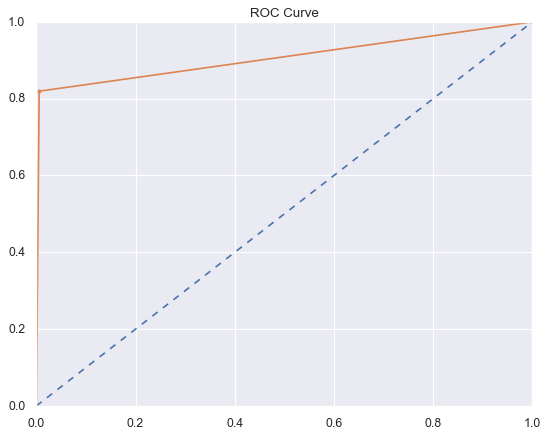

In [45]:
roc(dt_grid_model,y_pred)

**SVC**

In [46]:
from sklearn.svm import SVC

svc_model = SVC()

In [47]:
params = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'C':[1,1.2,1.4,1.6]}

svc_grid = GridSearchCV(svc_model,params,cv=10,scoring='accuracy',n_jobs=-1)

In [48]:
svc_grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 1.2, 1.4, 1.6],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [49]:
svc_grid.best_params_

{'C': 1.6, 'kernel': 'rbf'}

In [50]:
svc_grid.best_score_

0.9787677866348804

In [51]:
svc_grid_model = svc_grid.best_estimator_

In [52]:
svc_grid_model.fit(X_train,y_train)

y_pred = svc_grid_model.predict(X_test)

In [53]:
metrics_func(y_pred)


 accuracy_score :  

0.9794413407821229

 confusion_matrix :  

[[4050   77]
 [  15  333]]

 classification_report :  

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4127
           1       0.81      0.96      0.88       348

    accuracy                           0.98      4475
   macro avg       0.90      0.97      0.93      4475
weighted avg       0.98      0.98      0.98      4475


 roc_auc_score :  

0.9691194655882623

 recall_score :  

0.9568965517241379


**Applying KNN**

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train,y_train)

y_pred = knn_model.predict(X_test)

In [55]:
metrics_func(y_pred)


 accuracy_score :  

0.9783240223463687

 confusion_matrix :  

[[4047   79]
 [  18  331]]

 classification_report :  

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4126
           1       0.81      0.95      0.87       349

    accuracy                           0.98      4475
   macro avg       0.90      0.96      0.93      4475
weighted avg       0.98      0.98      0.98      4475


 roc_auc_score :  

0.9646385976413463

 recall_score :  

0.9484240687679083


Area Under the Curve : 0.94


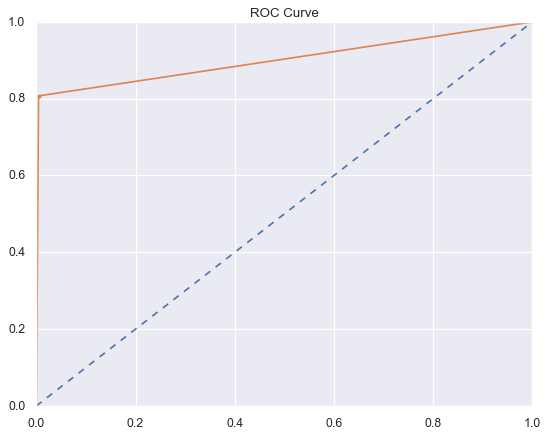

In [56]:
roc(knn_model,y_pred)

**Applying Naive Bayes**

In [57]:
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()

naive_model.fit(X_train,y_train)

y_pred = naive_model.predict(X_test)

In [58]:
metrics_func(y_pred)


 accuracy_score :  

0.9454748603351956

 confusion_matrix :  

[[3891   70]
 [ 174  340]]

 classification_report :  

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3961
           1       0.83      0.66      0.74       514

    accuracy                           0.95      4475
   macro avg       0.89      0.82      0.85      4475
weighted avg       0.94      0.95      0.94      4475


 roc_auc_score :  

0.821903147124149

 recall_score :  

0.6614785992217899


Area Under the Curve : 0.96


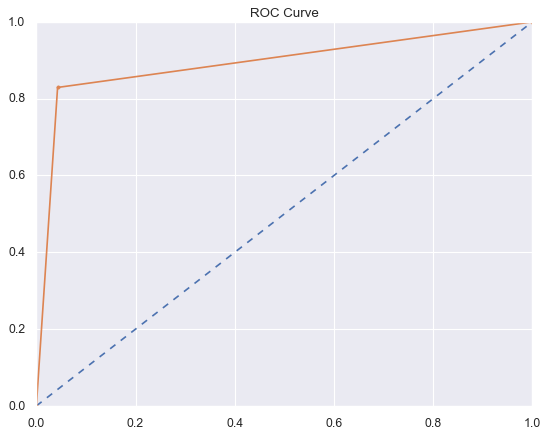

In [59]:
roc(naive_model,y_pred)

**Applying Adaboost**

In [60]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(learning_rate=1.5)

ada_model.fit(X_train,y_train)

y_pred = ada_model.predict(X_test)

In [61]:
metrics_func(y_pred)


 accuracy_score :  

0.9772067039106145

 confusion_matrix :  

[[4045   82]
 [  20  328]]

 classification_report :  

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4127
           1       0.80      0.94      0.87       348

    accuracy                           0.98      4475
   macro avg       0.90      0.96      0.93      4475
weighted avg       0.98      0.98      0.98      4475


 roc_auc_score :  

0.9613297906413887

 recall_score :  

0.9425287356321839


Area Under the Curve : 0.98


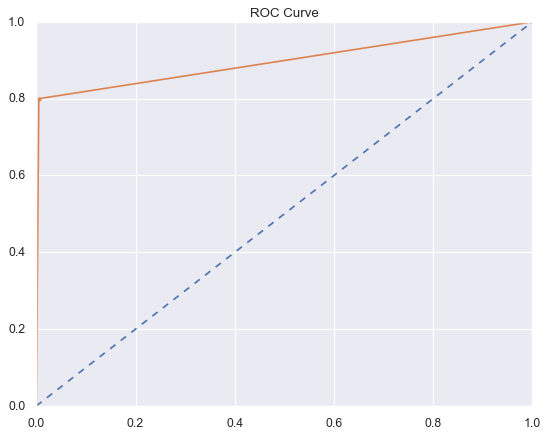

In [62]:
roc(ada_model,y_pred)

Text(0.5, 0, 'Models')

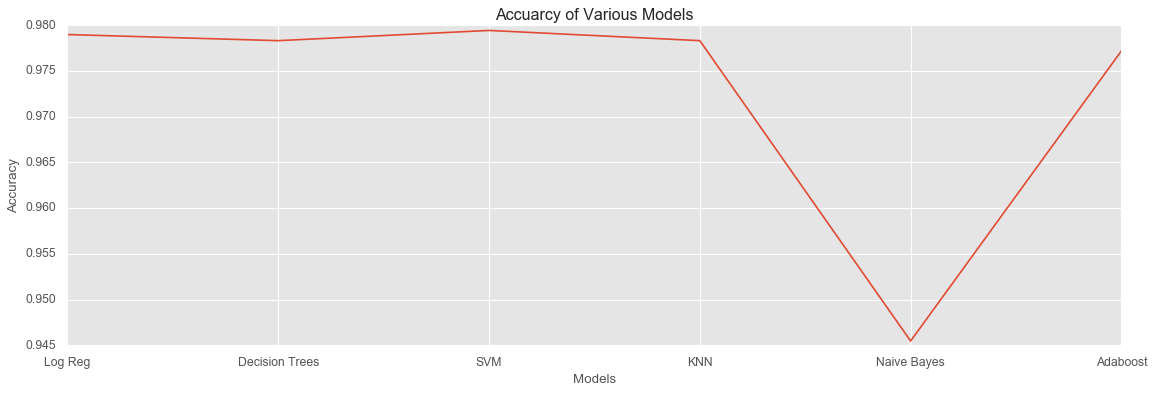

In [63]:
#Comparing All the Models

plt.style.use('ggplot')
plt.figure(figsize=(17,5))
models = ['Log Reg','Decision Trees','SVM','KNN','Naive Bayes','Adaboost']
pd.Series(data=accuracy,index=models).plot()
plt.title('Accuarcy of Various Models')
plt.ylabel('Accuracy')
plt.xlabel('Models')

Text(0.5, 0, 'Models')

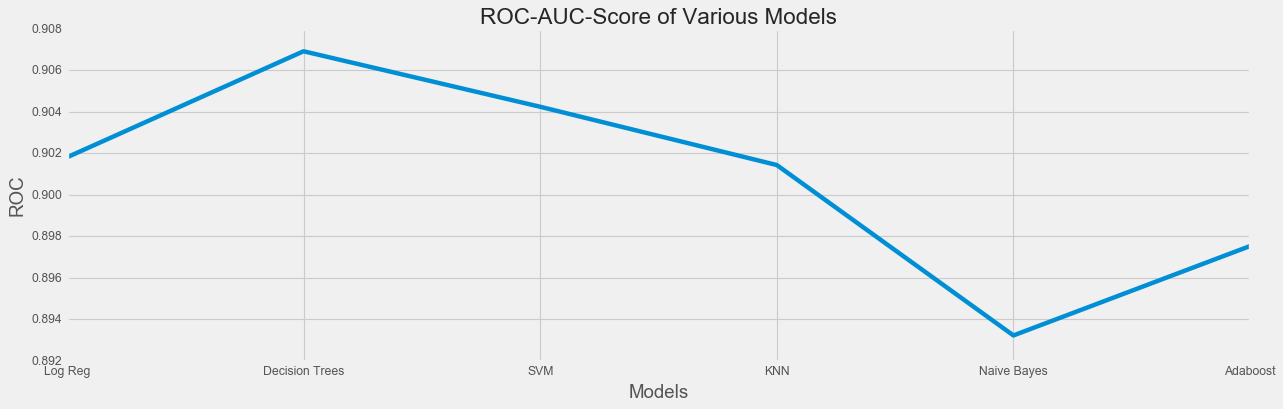

In [64]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(17,5))
models = ['Log Reg','Decision Trees','SVM','KNN','Naive Bayes','Adaboost']
pd.Series(data=roc_score,index=models).plot()
plt.title('ROC-AUC-Score of Various Models')
plt.ylabel('ROC')
plt.xlabel('Models')

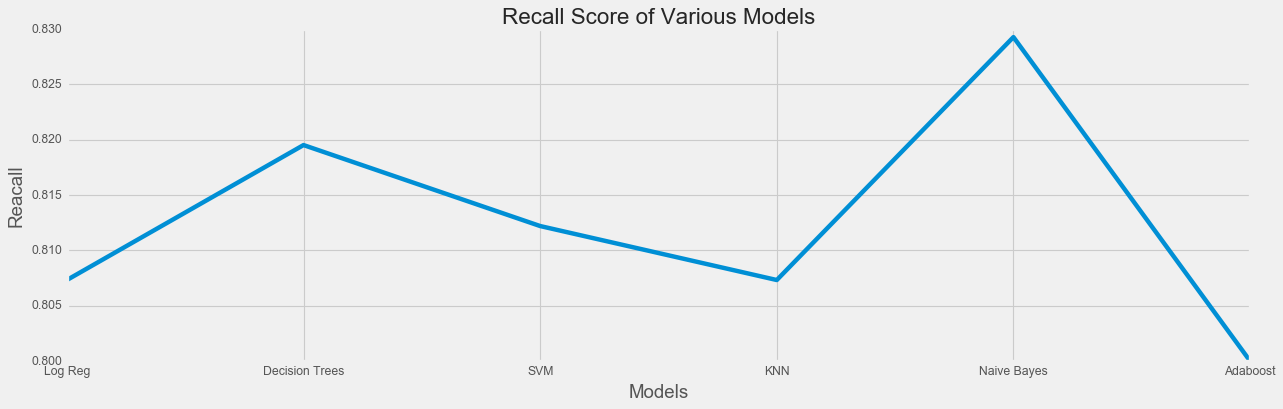

In [65]:
plt.style.use('fast')
plt.figure(figsize=(17,5))
models = ['Log Reg','Decision Trees','SVM','KNN','Naive Bayes','Adaboost']
pd.Series(data=recall,index=models).plot()
plt.title('Recall Score of Various Models')
plt.ylabel('Reacall')
plt.xlabel('Models');

**From the first two charts, we can say that Logistic Regression and Decision Trees performs best**

**But Also,Since the problem is recall and Naive Bayes issues best recall score,so we can choose that as well**

**Also Adaboost is the worst performer of the lot**

# Polar Star Prediction Done!!